# PDAN8412 PART 3

# Convolutional Neural Networks (CNN)
    
This notebook performs Convolutional Neural Networks (CNN)

**Explanation of Image Classification:**

Image classification is a supervised machine-learning task where a model learns to recognise visual patterns and assign images to predefined categories.  During training, the model analyses each image and identifies useful features such as colour, texture, shapes, or structural details that help distinguish one class from another. These learned features allow the model to make informed predictions when classifying new, unseen images (TensorFlow, 2024).

Image classification helps with a wide range of real-world applications, including facial recognition, object detection, medical-image analysis, and environmental monitoring. In this project, it is used to automatically assign scene images to one of six categories: forest, buildings, glacier, mountain, sea, or street.

**Explanation of What a CNN Is & How It Is Used for Image Classification**

A Convolutional Neural Network (CNN) is a deep-learning architecture designed specifically for processing and analysing visual data. CNNs use convolutional layers to automatically extract spatial hierarchies of features from images, allowing the model to learn patterns of increasing complexity (Chollet & Keras Team, 2024).

**Key Components**:

- Convolutional layers, which apply filters across the image to detect visual features such as edges, textures, colours, and shapes.

- Pooling layers, which reduce the spatial dimensions of the feature maps while preserving important information and lowering computational cost.

- Flattening and dense layers, which convert the extracted features into a form suitable for classification and learn relationships between them.

- A softmax output layer, which assigns class probabilities and produces the final prediction.

(Chollet & Keras Team, 2024)

# Evaluation and Justification of Dataset Chosen

**Dataset**: https://www.kaggle.com/datasets/puneet6060/intel-image-classification (Puneet6060, 2019).

**Why This Dataset Was Chosen:**

The Intel Image Classification dataset  was selected because it is a well-established benchmark commonly used in image-classification research. It contains a diverse set of natural scene categories, which makes it suitable for a multiclass classification task. The dataset includes approximately 14,000 labelled images, with a relatively balanced distribution across classes, and the images are high quality and organised into category-specific folders, making them straightforward to use in CNN workflows. Importantly, the dataset aligns well with the aims of this project by supporting the development of a general-purpose image classification model, without relying on domain-specific data such as facial images or medical scans (Puneet6060, 2019).


**Evaluate: Why Use This Dataset for CNN?**

This dataset is ideal for training a CNN because it provides the scale and diversity necessary for effective feature learning. CNNs usually perform best when trained on large datasets, and this collection offers thousands of images across multiple classes. The images vary in lighting, viewpoint, and environmental conditions, which helps the model learn robust, generalisable visual features. They also contain rich textures, shapes, and structural patterns, which convolutional filters are especially effective at capturing. Overall, the dataset closely aligns with the computational and structural needs of CNN-based image classification.


**Justify: Can This Dataset Be Used for Image Classification with CNN?**

- Clearly labelled categories: Each image belongs to one of six scene classes, making it well suited for supervised learning.

- Structured for deep-learning frameworks: The folder-based organisation allows tools such as TensorFlow/Keras or PyTorch to load the data directly with minimal preprocessing.

- Sufficient dataset size: The images provide high-dimensional visual input, which is essential for CNNs to learn meaningful spatial patterns.



**What is the quality of your dataset?**

Its relatively good!

- High-resolution, visually clear images, allowing the model to extract fine-grained features.

- Diverse image conditions, including variations in weather, lighting, camera angle, and environment.

- Large dataset size, which is well suited for deep-learning models that rely on extensive training data.

- Balanced class distribution, reducing the risk of model bias during training.

- Clear folder-based labelling, making the dataset easy to load and process within deep-learning pipelines.


**Suitability & Potential Pitfalls**

- High intra-class variability: Classes like mountain, street, and glacier contain visually diverse images, making it harder for the model to learn consistent patterns.

- Inter-class overlap: Some categories share similar features—e.g., glacier vs. mountain, forest vs. sea, street vs. buildings—leading to predictable confusion in the model.

- Real-world noise: Occasional presence of people, vehicles, animals, shadows, or low contrast can distract the CNN from key scene features.

- Unstandardised camera angles: Variation in viewpoints and framing introduces inconsistency and increases classification difficulty.


# Steps:


**1. Import the libraries**

- TensorFlow/Keras: Used to build, compile, and train the CNN, using layers such as Conv2D, MaxPooling2D, Dense, and Dropout.

- NumPy: Handled numerical arrays, enabling image conversion, normalisation, and batching.

- Matplotlib & Seaborn: Generated accuracy/loss plots and confusion-matrix heatmaps for model interpretation.

Scikit-learn: Provided train_test_split, classification_report, and confusion_matrix for evaluation.

- os module: Used to navigate the dataset folders and load file paths.

- SciKeras & scikit-learn Pipeline: Integrated preprocessing and model training into a single pipeline using Pipeline, FunctionTransformer, and KerasClassifier.

**2.Load dataset**

- Downloaded and extracted the Intel Image Classification dataset from Kaggle into separate training and testing folders, each containing six scene categories (buildings, forest, glacier, mountain, sea, street).

- Defined train_dir and test_dir to point to the dataset folders. For the generator-based workflow, ImageDataGenerator.flow_from_directory() was used to load images, resize them (e.g., 150×150), and assign labels automatically based on folder names.

- For the pipeline approach, custom helper functions were written to iterate through class folders using os.listdir, collect full image paths into X_train and X_test, and convert class names into numeric labels for y_train and y_test.

**3. Data Cleaning and Preparation**

- Verified class folders contained only valid image files, skipping any filenames starting with . and excluding non-image artefacts.

- Normalised pixel values by scaling images from 0–255 to 0–1.

    - Generator approach: ImageDataGenerator(rescale=1./255)

    - Pipeline approach: img_to_array(img) / 255.0 within a load_and_rescale function

- Checked for consistent image shapes (height, width, channels) across the dataset to ensure compatibility with fixed-size CNN input batches.

**4. Exploratory Data Analysis (EDA)**

- Checked class distribution by counting the number of images in each category for both the training and test sets to ensure classes were balanced and to reduce the risk of model bias.

- Visually inspected sample images from each class using Matplotlib subplots to understand typical colours, textures, and scene characteristics.

- Reviewed basic dataset statistics, including total image counts, image dimensions, and folder structure, to assess variability and confirm suitable input sizes for the CNN architecture.

**5. Preprocessing**

- Used automatic feature learning via the CNN, allowing convolutional layers to extract low-level features (edges, textures) and deeper layers to learn higher-level structures (shapes, scene layouts) without manual feature design.

- Standardised the input shape by resizing all images to a fixed dimension (e.g., 150×150×3 or 224×224×3), ensuring consistent resolution and colour channels across the dataset.

- Applied data augmentation in the generator workflow (rotations, shifts, zooms, horizontal flips) to increase dataset diversity and improve generalisation while reducing overfitting.

- Separated preprocessing in the pipeline approach by using FunctionTransformer(load_and_rescale) to convert file paths into resized, normalised arrays, keeping feature extraction distinct from model training.

**6. Defining Target Variable**

- Each image belongs to one of six classes: buildings, forest, glacier, mountain, sea, or street.

- Generator approach: flow_from_directory() automatically assigned class labels and produced one-hot encoded vectors (class_mode='categorical'), compatible with categorical_crossentropy.

- Pipeline approach: Labels were encoded as integers (0–5) and trained using sparse_categorical_crossentropy, enabling compatibility with scikit-learn and SciKeras.

**7. Train/Validation/Test Split**

- Generator method: Used validation_split (e.g., 80/20) inside ImageDataGenerator to create training and validation sets.

- The Kaggle test set was kept as a final hold-out for unbiased evaluation.

- Pipeline method: Used X_train, y_train for fitting and X_test, y_test for final evaluation, following typical scikit-learn splitting practices.

**8. Building the CNN Model**

- Constructed a CNN with stacked Conv2D + MaxPooling2D layers to extract spatial features, followed by Flatten to convert feature maps into a 1D vector.

- Added Dense layers (e.g., 128 units, ReLU) and Dropout to reduce overfitting.

- Final layer: Dense(6, activation='softmax') to output class probabilities.

- Compiled with Adam optimiser and categorical_crossentropy (or sparse version) and tracked accuracy.

**9. Creating the scikit-learn Style Pipeline**

- Built a two-step Pipeline:

    - "preprocess": FunctionTransformer(load_and_rescale) to convert file paths into normalised image arrays.

    - "cnn": A KerasClassifier (SciKeras) to build and train the CNN.

- Training with pipe.fit() automatically handled preprocessing and model fitting inside one modular workflow, enabling future cross-validation and tuning.

**10. Training the Model**

- Trained using model.fit() or pipe.fit() across multiple epochs with a defined batch size (e.g., 32).

- Used early stopping based on validation loss to prevent overfitting and retain the best weights.

- Monitored training/validation accuracy and loss, and saved the best model (e.g., .h5 file)

**11. Model Evaluation**

- Generator model: Evaluated with model.evaluate(test_gen).

- Pipeline model: Predicted with pipe.predict() and calculated accuracy using scikit-learn metrics.

- Generated a classification report (precision, recall, F1-score) to assess class-level performance.

- Plotted a confusion matrix to visualise misclassifications, highlighting common confusions such as glacier vs mountain or forest vs sea.

- Interpreted results in relation to dataset characteristics and model architecture.


**12. Testing**

- Converted the image into a NumPy array and prepared it for model input.

- Used model.predict() to generate prediction probabilities.

- Identified the predicted class using argmax.

- Created a show_and_predict() function to automate loading, predicting, and displaying images.

- Tested the model using an unseen image from the buildings class to confirm prediction accuracy.

- The model correctly identified the test image, confirming successful generalisation.

# Convolutional Neural Networks (CNN) Analysis

Kernal: spark311 (Python 3.11.13)

Operating system: Mac iOS.

Sections:

1. Import The libraries
2. Load Dataset
3. EDA
4. Preprocessing
5. Train/Test Split
6. Train CNN Model
7. Pipeline
8. Testing
9. Conclusion
10. Reference List

In [1]:
# Access the Kaggle API
!pip install kaggle

# Load Dataset

In [2]:
# Download the dataset from Kaggle
!kaggle datasets download -d puneet6060/intel-image-classification


Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100%|███████████████████████████████████████▉| 346M/346M [00:46<00:00, 7.56MB/s]
100%|████████████████████████████████████████| 346M/346M [00:46<00:00, 7.80MB/s]


In [3]:
# Unzipping the file to access the dataset.
!tar -xf "intel-image-classification.zip"

In [1]:
# Define directories
train_dir = '/Users/calvinstott/Desktop/VC /PDAN8411 2024/PDAN8412 POE/PART 3/seg_train/seg_train'
test_dir = '/Users/calvinstott/Desktop/VC /PDAN8411 2024/PDAN8412 POE/PART 3/seg_test/seg_test'
pred_dir = '/Users/calvinstott/Desktop/VC /PDAN8411 2024/PDAN8412 POE/PART 3/seg_pred'


In [2]:
#Load necessary libraries
import numpy as np
import pandas as pd
import os
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from PIL import Image
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization,MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter

2025-11-19 08:27:18.425118: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# EDA

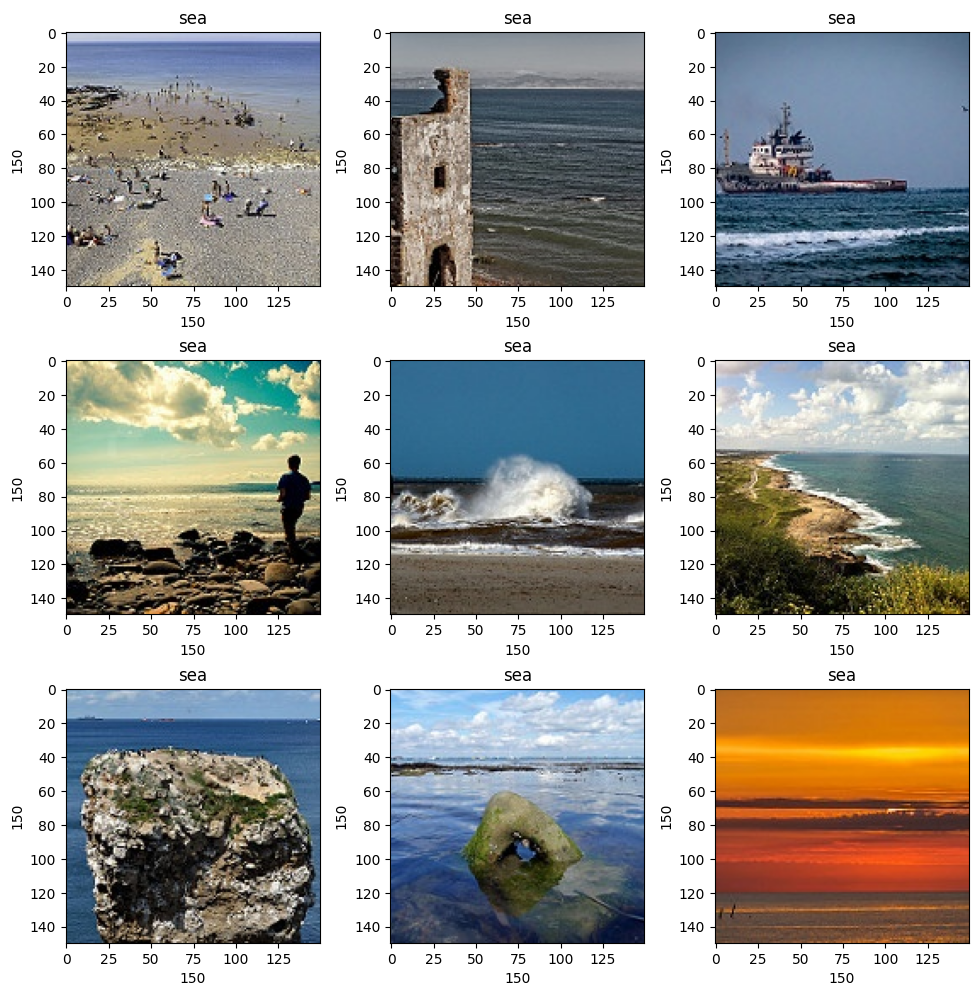

In [3]:
#Plot Images to check dataset
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

plt.figure(figsize=(10, 10))
path = '/Users/calvinstott/Desktop/VC /PDAN8411 2024/PDAN8412 POE/PART 3/seg_train/seg_train/sea'
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.tight_layout()
    rand_img = imread(path +'/' + random.choice(os.listdir(path)))
    plt.imshow(rand_img)
    plt.title('sea')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [4]:
#Printing shape
# Iterate over each class folder in the train directory
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):  # Check if it's a directory (a class folder)
        # Get the first image from the class folder
        first_image_path = os.path.join(class_path, os.listdir(class_path)[0])

        # Open the image and print its shape
        with Image.open(first_image_path) as img:
            print(f"Class: {class_name}, Shape: {img.size + (len(img.getbands()),)}")  # (width, height, channels)


Class: forest, Shape: (150, 150, 3)
Class: buildings, Shape: (150, 150, 3)
Class: glacier, Shape: (150, 150, 3)
Class: street, Shape: (150, 150, 3)
Class: mountain, Shape: (150, 150, 3)
Class: sea, Shape: (150, 150, 3)


In [5]:
#Check class Images for seg_train and seg_test
class_names = os.listdir(train_dir)
class_names = os.listdir(test_dir)
print(class_names)

#(Alexander Otchenashenko, 2023)

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']


In [6]:
#Print class indices for train_dir and test_dir
class_indices = {name: idx for idx, name in enumerate(os.listdir(train_dir))}
print(class_indices)
#(Alexander Otchenashenko, 2023)

{'forest': 0, 'buildings': 1, 'glacier': 2, 'street': 3, 'mountain': 4, 'sea': 5}


In [7]:
#Print class indices for test_dir
class_indices = {name: idx for idx, name in enumerate(os.listdir(test_dir))}
print(class_indices)

#(Alexander Otchenashenko, 2023)

{'forest': 0, 'buildings': 1, 'glacier': 2, 'street': 3, 'mountain': 4, 'sea': 5}


In [8]:
#Check the number of classes counts
print(len(os.listdir(train_dir)))

#(Alexander Otchenashenko, 2023)

6


In [9]:
#Checking number of test_dir classes
print(len(os.listdir(test_dir)))

#(Alexander Otchenashenko, 2023)

6


In [10]:
#Check value counts
# Dictionary to store counts of images per class
image_counts = {}

# Loop through each class folder
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        # Count image files in the class folder
        image_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        image_counts[class_name] = len(image_files)

# Display the counts
print(image_counts)
#(Alexander Otchenashenko, 2023)

{'forest': 2271, 'buildings': 2191, 'glacier': 2404, 'street': 2382, 'mountain': 2512, 'sea': 2274}


Text(0, 0.5, 'Number of Images')

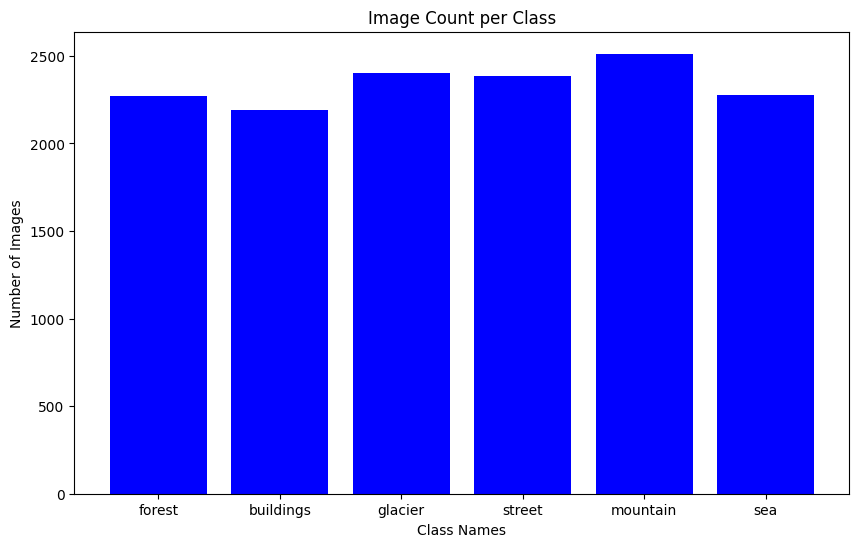

In [11]:
#Plot a graph for image files
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='blue')
plt.title('Image Count per Class')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')

In [12]:
#Check value counts
# Dictionary to store counts of images per class
image_counts = {}

# Loop through each class folder
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        # Count image files in the class folder
        image_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        image_counts[class_name] = len(image_files)

# Display the counts
print(image_counts)

{'forest': 474, 'buildings': 437, 'glacier': 553, 'street': 501, 'mountain': 525, 'sea': 510}


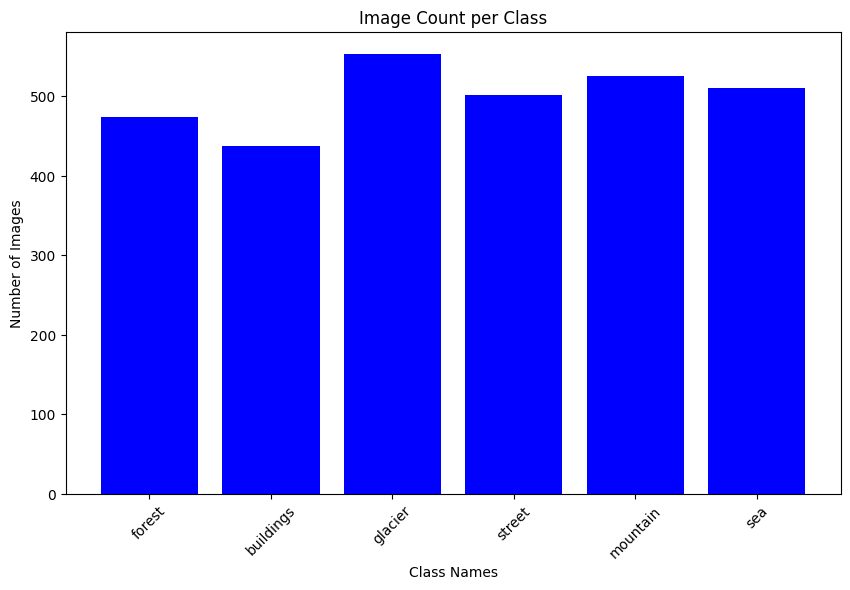

In [13]:
#Plot a graph for class counts
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='blue')
plt.title('Image Count per Class')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [14]:
img_size = (150, 150)
batch_size = 32

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [16]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.


2025-11-19 08:28:31.629611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


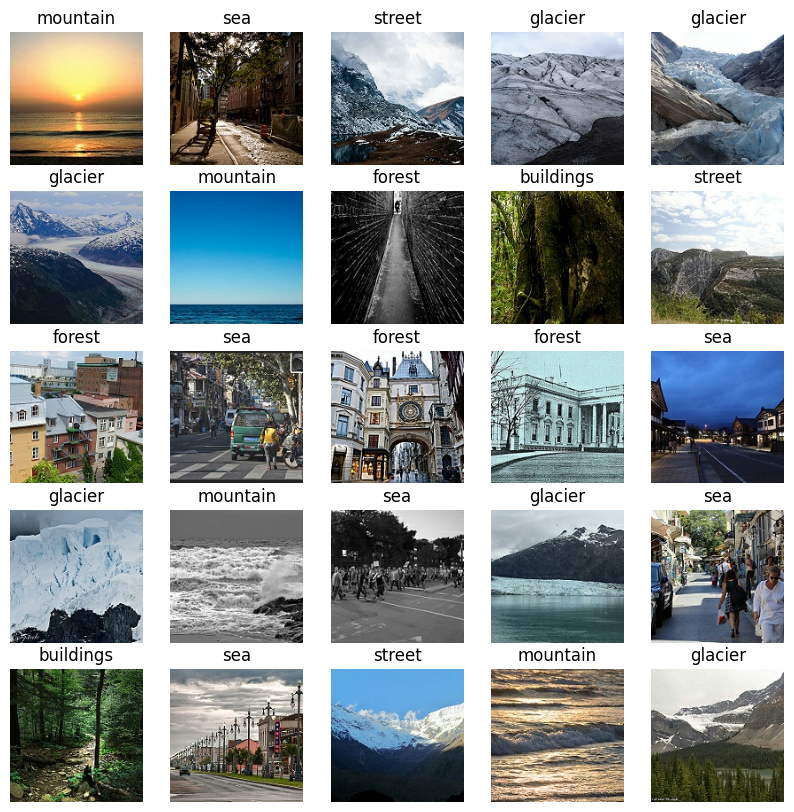

In [ ]:
# Train Images
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

2025-11-19 08:28:47.644281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


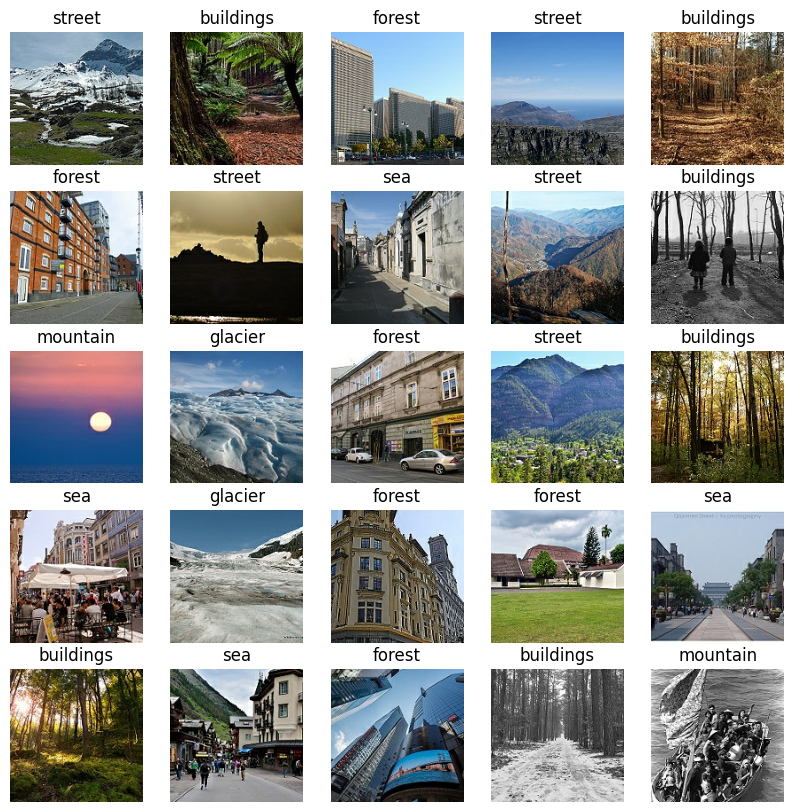

In [ ]:
# Test Images
plt.figure(figsize=(10,10))
for image,labels in test_ds.take(1):
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off') 


# Preprocessing

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 11230 images belonging to 6 classes.


In [22]:
val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2804 images belonging to 6 classes.


In [23]:
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3000 images belonging to 6 classes.


# Baseline CNN Model

In [24]:
from tensorflow.keras import layers, models, callbacks

In [ ]:
model = models.Sequential([
    layers.Input(shape=img_size + (3,)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes
])

# (Patel, 2017)

In [26]:
#Print the Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,   # changed it from 25 to 5 because it took long
    restore_best_weights=True
)

In [33]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=[early_stop]
)

Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.8204 - loss: 0.5136 - val_accuracy: 0.8313 - val_loss: 0.4908
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.8214 - loss: 0.5115 - val_accuracy: 0.8338 - val_loss: 0.4711
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 315s 896ms/step - accuracy: 0.8326 - loss: 0.4809 - val_accuracy: 0.8370 - val_loss: 0.4593
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 346s 985ms/step - accuracy: 0.8303 - loss: 0.4809 - val_accuracy: 0.8342 - val_loss: 0.4737
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 338s 963ms/step - accuracy: 0.8340 - loss: 0.4696 - val_accuracy: 0.8481 - val_loss: 0.4401


In [59]:
model.save("intel_cnn_model.keras")

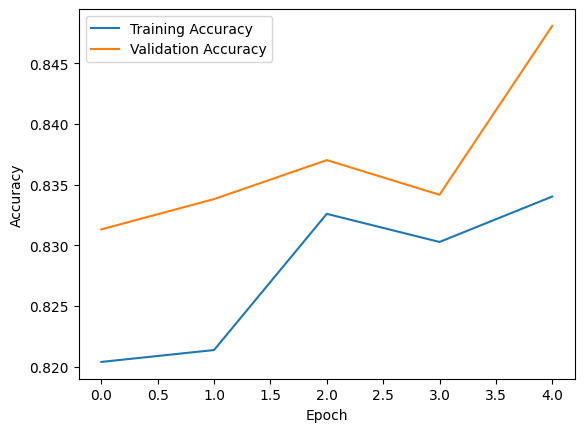

In [34]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'],
label='Training Accuracy')
plt.plot(history.history['val_accuracy'],
label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

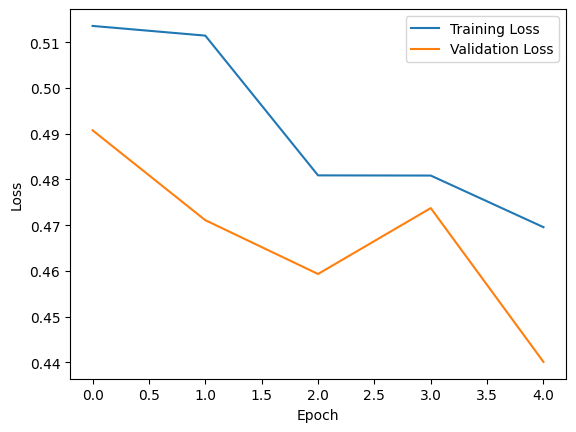

In [35]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_gen)
print(f'Test Accuracy: {test_acc}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.8497 - loss: 0.4407
Test Accuracy: 0.8496666550636292


In [37]:
#Generate predictions
predictions = model.predict(test_gen)

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step


In [38]:
#Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

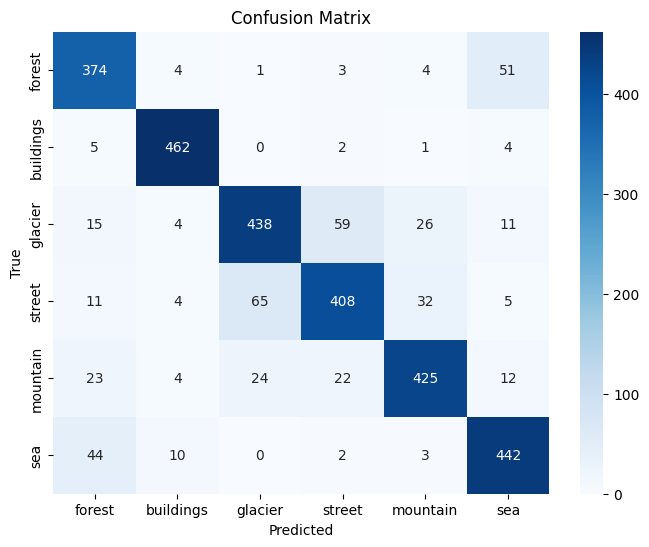

              precision    recall  f1-score   support

      forest       0.79      0.86      0.82       437
   buildings       0.95      0.97      0.96       474
     glacier       0.83      0.79      0.81       553
      street       0.82      0.78      0.80       525
    mountain       0.87      0.83      0.85       510
         sea       0.84      0.88      0.86       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [39]:
#Print confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_gen.classes, predicted_labels)
plt.figure(figsize=(8, 6))
# Use class_names for both xticklabels and yticklabels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(test_gen.classes, predicted_labels, target_names=class_names))

### Confusion Matrix:
The confusion matrix is a table that allows us to visualize the performance of the classification model. Each cell in the matrix represents the number of instances of a predicted class versus an actual class.


### Classification Report:
The classification report provides a summary of the precision, recall, and F1-score for each class.

- **Precision**: The ratio of correctly predicted instances among the total predicted instances of a class.
- **Recall**: The ratio of correctly predicted instances among the total actual instances of a class.
- **F1-Score**: The harmonic mean of precision and recall, providing a single metric to evaluate the model's performance.

#### Class-by-class Breakdown:

- **Forest**:
  - **Precision**: 0.79
  - **Recall**: 0.86
  - **F1-Score**: 0.82 - The model correctly identifies most forest images, but some are confused with sea and mountain.

- **Buildings**:
  - **Precision**: 0.95
  - **Recall**: 0.97
  - **F1-Score**: 0.96 - This is the best-performing class. The model almost never mislabels buildings and detects nearly all of them correctly.
  
- **Glacier**:
  - **Precision**: 0.83
  - **Recall**: 0.79
  - **F1-Score**: 0.81 - Performance is good but some glaciers are predicted as street or mountain, matching the confusion matrix.

- **Street**:
  - **Precision**: 0.82
  - **Recall**: 0.78
  - **F1-Score**: 0.80 - The model performs reasonably well, but streets are sometimes misclassified as glacier or mountain.

- **Mountain**:
  - **Precision**: 0.87
  - **Recall**: 0.83
  - **F1-Score**: 0.85 - Mountains are recognised quite reliably but theres is some overlap with forest and glacier categories.

- **Sea**:
  - **Precision**: 0.84
  - **Recall**: 0.88
  - **F1-Score**: 0.86 - Sea images are generally captured well, with some confusion with forest images.

### Summary:
- The model achieves an overall accuracy of 85% on the test set (3,000 images), which indicates strong performance for a multi-class scene recognition task.
- The buildings and sea classes show excellent performance, while glacier, street, forest and mountain are also handled well but exhibit more confusion with visually similar classes.

(Analytics Vidhya, 2021).


# Pipeline

In [97]:
model.save('intel_cnn_mode.h5')

In [ ]:
# Reload it later
model1 = tf.models.load_model("intel_cnn_model.h5")

In [40]:
!pip install scikeras

In [41]:
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Attribute: https://docs.python.org/3/library/
# Python Software Foundation (2024)

import os
import numpy as np

classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'] #sorted([d for d in os.listdir(train_dir) if not d.startswith('.')]) ------- (This was intially used because I needed to filter out hidden files/folders such as .DS_Store)
class_to_idx = {c: i for i, c in enumerate(classes)}

Collecting file paths and labels

In [62]:
def list_files_and_labels(root_dir):
    filepaths = []
    labels = []
    for cls in classes:
        folder = os.path.join(root_dir, cls)
        for f in os.listdir(folder):
            if f.startswith('.'):
                continue
            filepaths.append(os.path.join(folder, f))
            labels.append(class_to_idx[cls])
    return np.array(filepaths), np.array(labels)

In [63]:
X_train, y_train = list_files_and_labels(train_dir)
X_test,  y_test  = list_files_and_labels(test_dir)

**Pipeline step 1** – Preprocessing step (image loading + rescaling)

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img_size = (150, 150)

X is an array of file paths; return array of images (N, 150, 150, 3).

In [ ]:
def load_and_rescale(X):
    imgs = []
    for path in X:
        img = image.load_img(path, target_size=img_size)
        arr = image.img_to_array(img) / 255.0  # rescale to [0,1]
        imgs.append(arr)
    return np.stack(imgs)

**Pipeline step 2** – CNN model wrapped for sklearn

In [66]:
from tensorflow.keras import layers, models

num_classes = len(classes)

In [68]:
def create_cnn_model():
    model = models.Sequential([
        layers.Input(shape=img_size + (3,)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [69]:
# Wrap CNN for sklearn
cnn_clf = KerasClassifier(
    model=create_cnn_model,
    epochs=10,
    batch_size=32,
    verbose=1
)

In [70]:
# Build the pipeline: preprocess -> CNN
pipe = Pipeline([
    ("preprocess", FunctionTransformer(load_and_rescale, validate=False)),
    ("cnn", cnn_clf)
])

In [71]:
# Train
pipe.fit(X_train, y_train)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 527s 1s/step - accuracy: 0.5750 - loss: 1.0680
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.7248 - loss: 0.7493
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 372s 848ms/step - accuracy: 0.7728 - loss: 0.6270
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 331s 753ms/step - accuracy: 0.8106 - loss: 0.5254
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 348s 792ms/step - accuracy: 0.8426 - loss: 0.4429
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 324s 737ms/step - accuracy: 0.8699 - loss: 0.3730
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 323s 735ms/step - accuracy: 0.8869 - loss: 0.3234
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 318s 724ms/step - accuracy: 0.9100 - loss: 0.2602
Epoch 9/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 322s 733ms/step - accuracy: 0.9204 - loss: 0.2236
Epoch 10/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 324s 739ms/step - accuracy: 0.9346 - loss: 0.1859


Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function load_and_rescale at 0x144752e80>)),
                ('cnn',
                 KerasClassifier(batch_size=32, epochs=10, model=<function create_cnn_model at 0x14479efc0>))])

In [82]:
# Predict on test set
y_pred1 = pipe.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step


In [83]:
# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
test_acc1 = accuracy_score(y_test, y_pred1)
print(f'Test Accuracy: {test_acc1}')

Test Accuracy: 0.843


In [84]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred1, target_names=classes))

              precision    recall  f1-score   support

   buildings       0.82      0.79      0.80       437
      forest       0.97      0.96      0.97       474
     glacier       0.78      0.82      0.80       553
    mountain       0.81      0.80      0.80       525
         sea       0.86      0.83      0.84       510
      street       0.84      0.86      0.85       501

    accuracy                           0.84      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



### Summary of Pipeline Model Performance :

- The pipeline model achieves an overall accuracy of 84%, only slightly below the non-pipeline model, indicating the pipeline approach remains highly effective.

- Performance is balanced across all classes, with F1-scores ranging from 0.80 to 0.97.

- The best performing class is forest (F1 = 0.97), showing exceptional consistency.

- The model shows some confusion between visually similar terrain categories, which is common in scene recognition tasks.

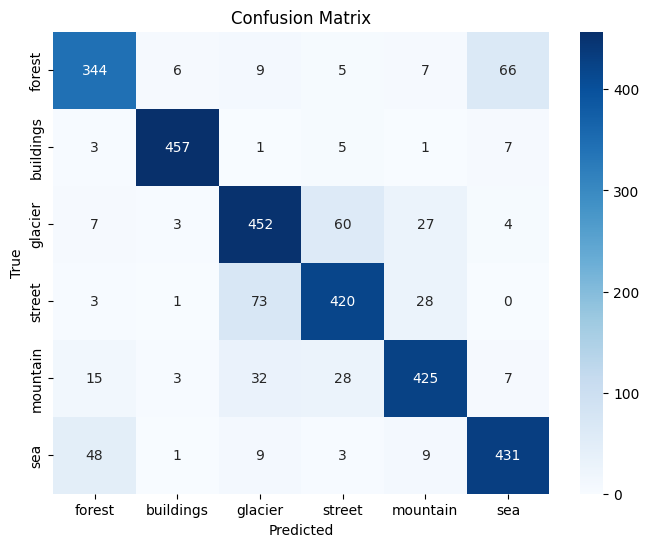

In [85]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
# Use class_names for both xticklabels and yticklabels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Observations** :

- Forest and buildings are classified extremely well, with strong diagonal values and relatively few misclassifications.

- Glacier, mountain, and street show moderate confusion with each other, which is typical due to shared features like rocks, roads, and snow.

- Sea images are also recognised very effectively (431 correct predictions), with occasional confusion with forest (48) and glacier (9).

- The confusion patterns show that the model struggles mostly where visual textures overlap between classes (e.g., mountain vs glacier, street vs glacier).

# Testing 

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/Users/calvinstott/Desktop/VC /PDAN8411 2024/PDAN8412 POE/PART 3/seg_train/seg_train/buildings/0.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices
if result[0][0] >= 0.5:
    prediction = 'building'
else:
    prediction = 'glacier'
print (prediction)
# (Agarwal, 2018)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
building


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_size = (150, 150)

def show_and_predict(model, img_path, class_names):
    # Load image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    preds = model.predict(img_array)
    class_index = np.argmax(preds)
    predicted_class = class_names[class_index]
    confidence = preds[0][class_index]

    # Display image + prediction
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title("Prediction:")
    plt.show()

# Example:
# show_and_predict(model, "path/to/image.jpg", class_names)


Testing a prediction for a building

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


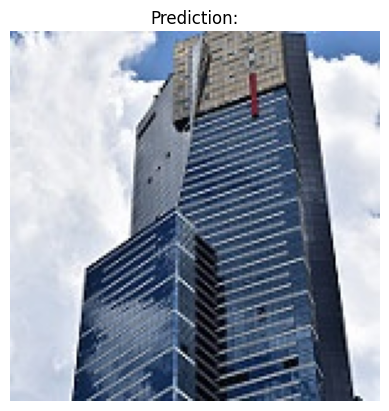

In [96]:
show_and_predict(model, "/Users/calvinstott/Desktop/VC /PDAN8411 2024/PDAN8412 POE/PART 3/seg_test/seg_test/buildings/20057.jpg", class_names)

# Conclusion


This project successfully developed, trained, and evaluated a Convolutional Neural Network (CNN) for multi-class scene image classification using the Intel Image Classification dataset. Following a structured machine-learning pipeline, the study covered the full workflow—from exploratory data analysis and preprocessing to model training, evaluation, and interpretation.

Both the standard CNN and the pipeline-based CNN achieved strong performance, with the sequential model reaching 85% test accuracy and the pipeline model 84%. These results confirm that the dataset is well-suited to deep learning applications and that the CNN algorithm effectively captures distinguishing visual features across the six scene categories.

Analysis of the confusion matrices and classification reports showed particularly high accuracy for visually distinct scenes such as forest, buildings, and sea, while moderate confusion occurred between more similar classes like glacier, mountain, and street. Such overlaps are expected due to shared textures and environmental features among these categories.

Overall, the findings demonstrate that the CNN can extract meaningful patterns and generalise effectively to unseen data. The use of a pipeline-based implementation also confirmed the model’s robustness and reproducibility, supporting its potential for real-world deployment and integration into scalable machine-learning systems.

# Reference List:

Agarwal, Y. (2018) Create your first Image Recognition Classifier using CNN, Keras and TensorFlow backend. Medium. Available at: https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd [Accessed: 19 Novemebr 2025].

Analytics Vidhya (2021) Understanding Confusion Matrix and Classification Report. Available at: https://www.analyticsvidhya.com/blog/2021/11/understanding-confusion-matrix-and-classification-report/ [Accessed: 17 Novemebr 2025].

Alexander Otchenashenko (2023). 11 Project 10 Intel Image Classification Flask App. YouTube. Available at: https://www.youtube.com/watch?v=kz8P70z2N6s [Accessed 18 Nov. 2024].

Chollet, F. and Keras Team (2024) Keras API Documentation: Model Summary. Available at: https://keras.io/api/models/model/#summary-method  [Accessed: 19 November 2025].

Patel, S. (2017). Introduction To Deep Neural Network. thinking-machine. Available at: https://snlpatel0012134.wixsite.com/thinking-machine/single-post/introduction-to-deep-neural-network [Accessed 18 Nov. 2024].

Puneet6060 (2019) Intel Image Classification Dataset. Kaggle. Available at: https://www.kaggle.com/datasets/puneet6060/intel-image-classification [Accessed: 14 November 2025].

Python Software Foundation (2024) Python Standard Library Documentation. Available at: https://docs.python.org/3/library/ [Accessed: 19 November 2025].

TensorFlow (2024) Image Classification. Available at: https://www.tensorflow.org/tutorials/images/classification [Accessed: 14 November 2025].

